# NAME:ASMELLASH GEBREYESUS 
    ID_NUMBER RM/0933/2014

# Description about the data

Water quality ML
Comparison of various classifier for water Quality Data!
Explore the docs »

View Demo · Report Bug · Request Feature

About The Project
The problem statement is, we have given data of quality of water and factors responsible for that and we have to classify the data using classifier algorithms and then compare the data of result obtained in each algorithm.

Classifiers in Machine Learning: - A classifier in machine learning is an algorithm that automatically orders or categorizes data into one or more of a set of “classes.”

Different types of classifiers we have used:

Linear Regression
Logistic Regression
K Nearest Neighbor (KNN)
Decision tree
Naive Bayes
Support Vector Machine (SVM)
Data Description: - Dataset consists of 16 independent references and one output reference. Ref1 and Ref2 doesn't have any impact on water quality and also since ref 'CARBOHYDRATE' has zero value for all it doesn't affect the quality. We have water quality data of 88 different places.

# import library 

In [100]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import itemfreq
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings



# load the dataset waterQuality

In [101]:
df=pd.read_csv("E:\dataa\water-quality\dataset.csv")
df.head()

,ID,SITENAME,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,waterQuality
0,1,Vengalapuram,268.0,7.3,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.6,10.9,-8.5,E
1,2,Kavalur,94.9,7.2,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.3,1.6,-2.1,A
2,3,Alangayam,226.1,7.5,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,1.0,4.2,-10.6,E
3,4,Vaniyambadi1,211.6,7.3,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.7,7.2,-6.5,E
4,5,Sangilikuppam,238.3,7.2,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.2,2.1,-12.0,E


In [102]:
df.describe

<bound method NDFrame.describe of      ID       SITENAME     Mg   PH  K(Potassium)  NITRATE  SULPHATE  \
0     1   Vengalapuram  268.0  7.3          10.0    276.0     304.0   
1     2        Kavalur   94.9  7.2           3.0      2.0      12.0   
2     3      Alangayam  226.1  7.5           0.0     16.0     150.0   
3     4   Vaniyambadi1  211.6  7.3           5.0    140.0     264.0   
4     5  Sangilikuppam  238.3  7.2           2.0    174.0     240.0   
..  ...            ...    ...  ...           ...      ...       ...   
83  134   Arakkonam-EW   12.0  7.7          25.0      8.6      29.0   
84  135     Arakkonam2   86.5  7.7          70.8     18.1     169.6   
85  136     Sholinghur   22.9  7.6          34.0      2.0      25.0   
86  137   Sholingar-EW   13.0  7.6          15.0     15.0      10.0   
87  138     Sholingar1   23.0  7.6          34.0      2.0      25.0   

    EC(Electrical Conductivity)  Ca(Calcium)  Na(Sodium)  CARBONATE  \
0                          5730         16

# Ratio of missing value

In [103]:
# number of missing values in each variable
df.isnull().sum()

ID                               0
SITENAME                         0
Mg                               0
PH                               0
K(Potassium)                     0
NITRATE                          0
SULPHATE                         0
EC(Electrical Conductivity)      0
Ca(Calcium)                      0
Na(Sodium)                       0
CARBONATE                        0
BICARBONATE                      0
CHLORIDE                         0
FLUORIDE                         0
SAR(Sodium Absorption Ratio)     0
RSC(Residual Sodium Carbonate    0
waterQuality                     0
dtype: int64

In [104]:
# percentage of missing values in each variable
df.isnull().sum()/len(df)*100



ID                               0.0
SITENAME                         0.0
Mg                               0.0
PH                               0.0
K(Potassium)                     0.0
NITRATE                          0.0
SULPHATE                         0.0
EC(Electrical Conductivity)      0.0
Ca(Calcium)                      0.0
Na(Sodium)                       0.0
CARBONATE                        0.0
BICARBONATE                      0.0
CHLORIDE                         0.0
FLUORIDE                         0.0
SAR(Sodium Absorption Ratio)     0.0
RSC(Residual Sodium Carbonate    0.0
waterQuality                     0.0
dtype: float64

In [105]:
# saving missing values in a variable
a=df.isnull().sum()/len(df)*100

# saving column names in a variable
variables = df.columns

In [106]:
# new variable to store variables having missing values less than a threshold

variable = [ ]

for i in range(df.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

In [107]:
# creating a new dataframe using the above variables

new_data = df[variable]
new_data.head()

,ID,SITENAME,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,waterQuality
0,1,Vengalapuram,268.0,7.3,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.6,10.9,-8.5,E
1,2,Kavalur,94.9,7.2,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.3,1.6,-2.1,A
2,3,Alangayam,226.1,7.5,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,1.0,4.2,-10.6,E
3,4,Vaniyambadi1,211.6,7.3,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.7,7.2,-6.5,E
4,5,Sangilikuppam,238.3,7.2,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.2,2.1,-12.0,E


In [108]:
# percentage of missing values in each variable of new data

new_data.isnull().sum()/len(new_data)*100


ID                               0.0
SITENAME                         0.0
Mg                               0.0
PH                               0.0
K(Potassium)                     0.0
NITRATE                          0.0
SULPHATE                         0.0
EC(Electrical Conductivity)      0.0
Ca(Calcium)                      0.0
Na(Sodium)                       0.0
CARBONATE                        0.0
BICARBONATE                      0.0
CHLORIDE                         0.0
FLUORIDE                         0.0
SAR(Sodium Absorption Ratio)     0.0
RSC(Residual Sodium Carbonate    0.0
waterQuality                     0.0
dtype: float64

In [109]:
# shape of new and original data

new_data.shape, df.shape


((88, 17), (88, 17))

In [110]:
df['waterQuality'] = df['waterQuality'].replace(['A'],'1')
df['waterQuality'] = df['waterQuality'].replace(['B'],'2')
df['waterQuality'] = df['waterQuality'].replace(['C'],'3')
df['waterQuality'] = df['waterQuality'].replace(['D'],'4')
df['waterQuality'] = df['waterQuality'].replace(['E'],'5')
df.head()

,ID,SITENAME,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,waterQuality
0,1,Vengalapuram,268.0,7.3,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.6,10.9,-8.5,5
1,2,Kavalur,94.9,7.2,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.3,1.6,-2.1,1
2,3,Alangayam,226.1,7.5,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,1.0,4.2,-10.6,5
3,4,Vaniyambadi1,211.6,7.3,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.7,7.2,-6.5,5
4,5,Sangilikuppam,238.3,7.2,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.2,2.1,-12.0,5


In [111]:
y = df['waterQuality'].astype('int32')
x = df.drop(columns = ['SITENAME','ID','CARBONATE'], axis = 1)
model = x
model.head()

,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,waterQuality
0,268.0,7.3,10.0,276.0,304.0,5730,16.0,850,878.0,1304.0,1.6,10.9,-8.5,5
1,94.9,7.2,3.0,2.0,12.0,1069,24.0,77,421.0,163.0,1.3,1.6,-2.1,1
2,226.1,7.5,0.0,16.0,150.0,2830,20.0,300,549.0,631.0,1.0,4.2,-10.6,5
3,211.6,7.3,5.0,140.0,264.0,3600,20.0,500,726.0,680.0,1.7,7.2,-6.5,5
4,238.3,7.2,2.0,174.0,240.0,2300,24.0,152,537.0,305.0,1.2,2.1,-12.0,5


In [112]:
df['waterQuality'].value_counts()


1    37
3    21
5    17
2     7
4     6
Name: waterQuality, dtype: int64

In [113]:
inputs = model.drop(columns = ['waterQuality'], axis = 1)
target = model['waterQuality'].astype('int32')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target=le.fit_transform(model['waterQuality'])

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2, random_state = 35)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, metrics,naive_bayes,neighbors,svm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [116]:
DecisionTree=tree.DecisionTreeClassifier()
naive_bayes=naive_bayes.GaussianNB()
svnm=svm.SVC()
knn=neighbors.KNeighborsClassifier()
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

In [117]:
DecisionTree.fit(X_train,y_train)
y=DecisionTree.predict(X_test)
naive_bayes.fit(X_train,y_train)
ynn=naive_bayes.predict(X_test)
svnm.fit(X_train,y_train)
ysvm=svnm.predict(X_test)
knn.fit(X_train,y_train)
yknn=knn.predict(X_test)
classifier.fit(X_train,y_train)
Rf= classifier.predict(X_test)
print("accuracy_score of Nearest_Neighbors",metrics.accuracy_score(y_test,ynn))
print("accuracy_score of Suport Vector Machines",metrics.accuracy_score(y_test,ysvm))
print("accuracy_score of decition tree",metrics.accuracy_score(y_test,y))
print("accuracy_score of Naive_Bayes",metrics.accuracy_score(y_test,yknn))
print("accuracy_score of RandomForest",metrics.accuracy_score(y_test,Rf))

accuracy_score of Nearest_Neighbors 0.7777777777777778
accuracy_score of Suport Vector Machines 0.8333333333333334
accuracy_score of decition tree 0.7222222222222222
accuracy_score of Naive_Bayes 0.6666666666666666
accuracy_score of RandomForest 0.7777777777777778


In [118]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(y_test, y))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(y_test, yknn))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(y_test, ynn))
print("\nClassification report for SVC") 
print(metrics.classification_report(y_test, ysvm))
print("\nClassification report for Randomforest") 
print(metrics.classification_report(y_test, Rf))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00         1
           4       0.80      1.00      0.89         4

    accuracy                           0.72        18
   macro avg       0.46      0.46      0.46        18
weighted avg       0.79      0.72      0.75        18


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       1.00      0.75      0.86         4

    accuracy                           0.67        18
   macro avg       0.38      0.33      0.35   

C:\Users\ASME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASME\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASME\anaconda3\lib\site-packages\sklearn\metrics\

In [119]:
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, y))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(y_test, yknn))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_test, ynn))
print("\nConfusion matrix for SVC") 
print(metrics.confusion_matrix(y_test, ysvm))
print("\nConfusion matrix for RandomForest") 
print(metrics.confusion_matrix(y_test,  Rf))





Confusion matrix for K-Nearest Neighbor
[[8 2 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 1]
 [0 0 1 0 0]
 [0 0 0 0 4]]

Confusion matrix for Naive Bayes
[[9 0 1 0 0]
 [0 0 1 0 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 3]]

Confusion matrix for Decision Tree
[[9 0 1 0 0]
 [0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 4]]

Confusion matrix for SVC
[[9 0 1 0 0]
 [0 0 1 0 0]
 [0 0 2 0 0]
 [0 0 1 0 0]
 [0 0 0 0 4]]

Confusion matrix for RandomForest
[[9 0 1 0 0]
 [0 0 1 0 0]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 4]]


In [120]:
y_pred_probs = knn.predict_proba(X_test)

y_pred_probs[:10]

array([[0.6, 0.2, 0. , 0.2, 0. ],
       [0.8, 0.2, 0. , 0. , 0. ],
       [0.6, 0.2, 0.2, 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. ],
       [0.4, 0.4, 0.2, 0. , 0. ],
       [0.8, 0.2, 0. , 0. , 0. ],
       [0. , 0.2, 0.4, 0. , 0.4],
       [0. , 0. , 0.2, 0. , 0.8],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0.2, 0.6]])

In [121]:
y_pred_probs = naive_bayes.predict_proba(X_test)

y_pred_probs[:10]

array([[9.95942070e-001, 5.49927669e-005, 4.00256963e-003,
        3.67545610e-007, 1.07798506e-010],
       [9.98986662e-001, 7.80817745e-006, 1.00552926e-003,
        1.13410466e-010, 1.67358849e-013],
       [9.99879583e-001, 2.34495198e-005, 9.69673414e-005,
        5.91617621e-011, 4.19945700e-013],
       [8.94447143e-001, 3.16641238e-002, 7.38887331e-002,
        7.93727492e-025, 1.03991876e-012],
       [3.04493467e-006, 9.28687892e-001, 3.85808964e-002,
        3.27276595e-002, 5.06930295e-007],
       [9.99975630e-001, 8.73847022e-007, 2.34959653e-005,
        2.12425594e-027, 6.89656573e-014],
       [4.74991439e-057, 1.34585222e-010, 7.19433755e-007,
        2.33011455e-105, 9.99999280e-001],
       [5.71707214e-093, 5.88637302e-045, 3.94858430e-008,
        1.73307691e-192, 9.99999961e-001],
       [9.99999994e-001, 2.36219136e-014, 6.24532772e-009,
        4.02587961e-033, 1.50117919e-029],
       [2.07711512e-037, 3.10114358e-012, 1.15610335e-002,
        2.95863131e-020

In [122]:
y_pred_probs = DecisionTree.predict_proba(X_test)
y_pred_probs[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [123]:
y_pred_probs = DecisionTree.predict_proba(X_test)
y_pred_probs[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [124]:
y_pred_probs = classifier.predict_proba(X_test)

y_pred_probs[:10]

array([[0.67 , 0.12 , 0.13 , 0.075, 0.005],
       [0.53 , 0.16 , 0.24 , 0.07 , 0.   ],
       [0.705, 0.21 , 0.065, 0.02 , 0.   ],
       [0.305, 0.305, 0.285, 0.105, 0.   ],
       [0.19 , 0.055, 0.59 , 0.135, 0.03 ],
       [0.955, 0.005, 0.04 , 0.   , 0.   ],
       [0.02 , 0.115, 0.24 , 0.075, 0.55 ],
       [0.01 , 0.035, 0.2  , 0.05 , 0.705],
       [0.97 , 0.   , 0.03 , 0.   , 0.   ],
       [0.   , 0.045, 0.035, 0.06 , 0.86 ]])

# Defining learning classifiers

In [125]:
classifiersnames = ["Nearest_Neighbors", "Linear_SVM",  "Decision_Tree",
         "Naive_Bayes","RandomForest"]
classifiers = [
    KNeighborsClassifier(),
    SVC(C=1, kernel='linear', gamma='auto'),
    DecisionTreeClassifier(),
    GaussianNB(),RandomForestClassifier()]

# Build Model, Apply Model on Test Data & Record Accuracy Scores

In [126]:
accuracy_score = []
for name, clf in zip(classifiersnames, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    accuracy_score.append(score)

In [127]:
import pandas as pd
import seaborn as sns

# Create data frame of *model performance*

In [128]:
df = pd.DataFrame()
df['classifiersnames'] = classifiersnames
df['accuracy_score'] = accuracy_score 
df

,classifiersnames,accuracy_score
0,Nearest_Neighbors,0.666667
1,Linear_SVM,0.833333
2,Decision_Tree,0.722222
3,Naive_Bayes,0.777778
4,RandomForest,0.722222


# Adding colors to the data frame

In [129]:
cm = sns.light_palette("black", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,classifiersnames,accuracy_score
0,Nearest_Neighbors,0.666667
1,Linear_SVM,0.833333
2,Decision_Tree,0.722222
3,Naive_Bayes,0.777778
4,RandomForest,0.722222


# barplot

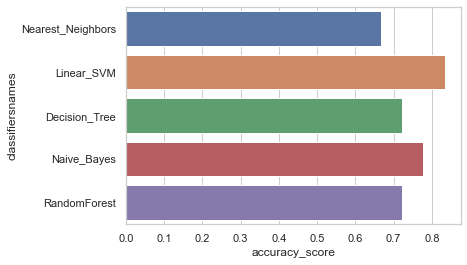

In [130]:
sns.set(style="whitegrid")
ax = sns.barplot(y="classifiersnames", x="accuracy_score", data=df)

# importing necessary libraries

In [145]:
from scipy.stats import itemfreq
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

# splitting the dataset

In [146]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.95,0.05], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 3: Plot the ROC Curve

In [147]:
DecisionTree.fit(X_train,y_train)
DecisionTree.score(X_test, y_test)
y=DecisionTree.predict(X_test)
naive_bayes.fit(X_train,y_train)
naive_bayes.score(X_train,y_train)
ynn=naive_bayes.predict(X_test)
svnm.fit(X_train,y_train)
svnm.score(X_test, y_test)
ysvm=svnm.predict(X_test)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)
yknn=knn.predict(X_test)
classifier.fit(X_train,y_train)
classifier.score(X_test, y_test)
Rf= classifier.predict(X_test)

# predict probability

In [149]:
#r_probs = [0 for _ in range(len(y_test))]
y = DecisionTree.predict(X_test)
ynn=naive_bayes.predict(X_test)
ysvm=svnm.predict(X_test)
yknn=knn.predict(X_test)
Rf= classifier.predict(X_test)

# compute the auc

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score
#r_auc = roc_auc_score(y_test, r_probs)
y_auc = roc_auc_score(y_test, y)
ynn_auc = roc_auc_score(y_test, ynn)
ysvm_auc = roc_auc_score(y_test, ysvm)
yknn_auc = roc_auc_score(y_test, yknn)
Rf_auc = roc_auc_score(y_test, Rf)

# Display the aucroc

In [153]:
#print("Random prediction: AUROC = %.3f" %(Rf_auc))
print("Naive Bayes: AUROC = %.3f" %(ynn_auc))
print("Decision Tree prediction: AUROC = %.3f" %(y_auc))
print("KNearest neighbors prediction: AUROC = %.3f" %(yknn_auc ))
print("Support vector machine: AUROC = %.3f" %(ysvm_auc))

Naive Bayes: AUROC = 0.789
Decision Tree prediction: AUROC = 0.751
KNearest neighbors prediction: AUROC = 0.623
Support vector machine: AUROC = 0.631


# calculate the ROC curve

In [155]:
#r_fpr, r_tpr, _= roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, Rf)
nb_fpr, nb_tpr,_ = roc_curve(y_test, ynn)
dt_fpr, dt_tpr,_ = roc_curve(y_test, y)
knn_fpr, knn_tpr,_ = roc_curve(y_test, yknn)
sv_fpr, sv_tpr, _ = roc_curve(y_test, ysvm)

# plot the ROC Curve

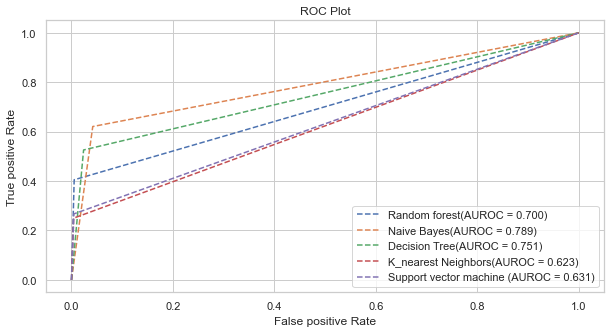

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
#plt.plot(r_fpr, r_tpr, linestyle= '--', label = 'Random prediction(AUROC = %0.3f)' %r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle= '--', label = 'Random forest(AUROC = %0.3f)' %Rf_auc)
plt.plot(nb_fpr, nb_tpr, linestyle= '--', label = 'Naive Bayes(AUROC = %0.3f)' %ynn_auc)
plt.plot(dt_fpr, dt_tpr, linestyle= '--', label = 'Decision Tree(AUROC = %0.3f)' %y_auc)
plt.plot(knn_fpr, knn_tpr, linestyle= '--', label = 'K_nearest Neighbors(AUROC = %0.3f)' %yknn_auc)
plt.plot(sv_fpr, sv_tpr, linestyle= '--', label = 'Support vector machine (AUROC = %0.3f)' %ysvm_auc)
plt.title('ROC Plot')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
#show legend
plt.legend()
plt.show()

In [ ]:
# Thanks !!!